# import packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append("src/")
from src import *

In [3]:
ct = 'LA'

# shuffle data

In [17]:
data = pd.read_feather(f'../data/phos_MS_merged/LA/LA.feather')
data.index = data['index'].tolist()
data = data.drop(['index'], axis=1)

data

,CPT0089340003 Log Ratio_149,CPT0092930003 Log Ratio_149,CPT0015410003 Log Ratio_149,CPT0146980004 Log Ratio_149,CPT0148280004 Log Ratio_149,CPT0011710004 Log Ratio_149,CPT0117970003 Log Ratio_149,CPT0069360003 Log Ratio_149,CPT0083100003 Log Ratio_149,CPT0118160003 Log Ratio_149,...,P060-2-1 Log Ratio.1_220,P033-1-1 Log Ratio.1_220,P033-2-1 Log Ratio.1_220,P034-1-1 Log Ratio.1_220,P034-2-1 Log Ratio.1_220,P035-1-1 Log Ratio.1_220,P035-2-1 Log Ratio.1_220,P036-1-1 Log Ratio.1_220,P036-2-1 Log Ratio.1_220,P099-2-1 Log Ratio.1_220
A0A068F7M9:S367,1.160599,-0.785648,0.701768,0.845731,2.104418,-0.205657,-1.253096,0.516774,1.787848,0.149857,...,0.105279,0.950191,0.619044,1.189831,0.939504,0.766703,0.593673,0.594216,0.758076,1.852356
A0A068F7M9:S512,0.008341,-0.664781,0.060819,0.269422,1.131034,-0.930159,-1.365682,0.437698,-0.484164,0.137963,...,0.245673,0.811213,0.236527,0.573692,0.648073,0.524216,0.024614,0.310124,-0.071743,0.080257
A0A068F7M9:S524,-0.791635,0.223125,-0.393147,-0.000657,-0.701046,0.512923,-0.358903,0.510525,0.422324,-0.917179,...,-0.386377,0.138498,-0.288751,-0.223539,-0.337266,0.235766,-0.495823,-0.351144,0.043126,0.221002
A0A068F7M9:S549,-0.530674,0.134670,-0.108628,0.086774,-0.626924,-0.046150,-0.429380,0.796922,0.675949,-0.489622,...,-0.631879,0.073868,0.025596,-0.456592,0.108040,0.120162,-1.026987,-0.723622,0.310580,0.324450
A0A068F7M9:T716,0.785697,-0.522639,0.655184,0.781280,0.982768,-0.011252,-1.235414,-0.014596,1.379859,0.005810,...,0.735629,0.931703,0.210715,0.893813,0.594307,0.478383,0.130575,0.902153,-0.272187,0.900049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6X9:S779,-0.138535,-0.838458,-0.978102,0.216551,0.102184,-0.466315,-0.588148,-0.628020,-0.673664,0.699772,...,0.133539,0.063099,0.415108,-0.166400,0.340339,-0.070382,0.325970,-0.311548,-0.522711,-0.613686
Q9Y6Y8:S737,0.136207,-1.351158,-0.609195,0.022907,-0.378309,-0.602094,-1.616561,-0.134432,-1.133546,-0.177347,...,-0.623899,0.289858,0.069794,-0.063928,0.482998,0.104185,0.028254,-0.430815,-0.421314,-0.225017
Q9Y6Y8:S926,0.880461,-1.879582,-0.540097,-0.205447,-0.402004,-0.579833,-0.468415,-0.446359,0.231258,-0.824231,...,0.725982,-0.085941,0.236622,-0.268278,0.108873,-0.399275,-0.280242,-0.472973,-0.621344,0.403162
U5Y3L1:S155,0.262869,-1.736287,-0.714079,-0.013522,0.493945,-0.313066,-1.640596,0.359234,0.718721,0.064995,...,0.656152,0.449372,0.428128,0.251605,0.967831,0.062699,0.930259,0.130113,-0.496392,0.270515


In [18]:
values_flatten = np.array(data).flatten()
values_flatten_small = values_flatten[values_flatten < 1]
values_flatten_large = values_flatten[values_flatten >= 1]

rs = 1
np.random.seed(rs)
np.random.shuffle(values_flatten_small)
np.random.shuffle(values_flatten_large)

filled_data_large = values_flatten_large.tolist() + values_flatten_small.tolist()[:len(values_flatten_small) - len(values_flatten_large)]
filled_data_samll = values_flatten_small.tolist()[len(values_flatten_small) - len(values_flatten_large):]


data_shuffled = data.copy()
data_shuffled[data < 1] = filled_data_large
data_shuffled[data >= 1] = filled_data_samll


data_shuffled

,CPT0089340003 Log Ratio_149,CPT0092930003 Log Ratio_149,CPT0015410003 Log Ratio_149,CPT0146980004 Log Ratio_149,CPT0148280004 Log Ratio_149,CPT0011710004 Log Ratio_149,CPT0117970003 Log Ratio_149,CPT0069360003 Log Ratio_149,CPT0083100003 Log Ratio_149,CPT0118160003 Log Ratio_149,...,P060-2-1 Log Ratio.1_220,P033-1-1 Log Ratio.1_220,P033-2-1 Log Ratio.1_220,P034-1-1 Log Ratio.1_220,P034-2-1 Log Ratio.1_220,P035-1-1 Log Ratio.1_220,P035-2-1 Log Ratio.1_220,P036-1-1 Log Ratio.1_220,P036-2-1 Log Ratio.1_220,P099-2-1 Log Ratio.1_220
A0A068F7M9:S367,0.938587,1.274489,1.235329,1.168252,-0.637856,3.382592,2.584640,1.075585,-0.038312,1.235018,...,1.190163,2.680085,1.842140,-0.088551,1.215419,1.315662,1.106595,1.980725,1.156904,0.477291
A0A068F7M9:S512,1.015554,1.511386,1.516851,1.151758,0.318983,1.516182,1.080305,1.351510,2.311266,1.034025,...,1.466152,1.699802,1.069493,2.169534,1.075678,1.082042,1.184281,1.018456,1.069989,1.061003
A0A068F7M9:S524,1.018624,1.149018,1.134093,1.085314,1.552705,1.071141,1.774480,1.457860,1.669447,1.146433,...,1.627582,1.198178,1.272853,1.035965,1.333437,1.154223,1.289581,1.458285,2.258902,1.046330
A0A068F7M9:S549,1.259766,1.770174,1.585651,1.619344,1.029147,1.069600,1.069475,1.130086,1.375944,1.487540,...,1.205978,1.608617,2.095640,1.541723,1.444172,1.033071,1.102318,1.483844,2.797764,1.944073
A0A068F7M9:T716,1.249563,1.800094,1.427395,1.498812,1.675091,1.137071,1.111797,1.664546,0.255994,1.946292,...,1.751885,1.684624,1.205245,1.373622,1.219178,1.102479,1.035310,1.123511,1.682639,3.772686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6X9:S779,0.775581,0.261228,0.415547,-0.463721,-0.121873,0.121226,0.251225,0.807575,-0.082186,-0.629678,...,-0.223985,0.402287,-0.154651,0.002240,-0.476473,-0.209308,-0.295363,0.242084,-0.461903,-0.476191
Q9Y6Y8:S737,-0.997490,0.226673,-0.241981,-0.413537,0.480954,0.307301,-0.219358,-0.454427,0.421801,0.502767,...,0.614224,0.201197,-1.771930,0.262803,-0.065675,0.669900,-0.490322,0.128870,-0.112898,0.344282
Q9Y6Y8:S926,-0.506346,0.829385,0.614989,0.271221,-0.890412,0.351392,0.264080,-0.633544,-0.211445,0.173415,...,0.211349,0.565552,-0.537846,-0.967252,0.463000,-0.855108,-0.363519,0.110756,-1.221762,0.736773
U5Y3L1:S155,-1.446918,0.134580,-0.040222,0.565116,0.890736,0.525083,-2.076996,-0.918643,-0.261503,-0.057027,...,0.047280,-0.339066,0.414096,0.834027,-2.763870,-0.510607,0.168572,0.520930,0.329220,0.647574


In [19]:
os.makedirs(f'data/shuffled_data/{ct}/', exist_ok=True)

data_shuffled = data_shuffled.reset_index()
data_shuffled.to_feather(f'data/shuffled_data/{ct}/{ct}_{rs}.feather')

# data preprocess

In [20]:
data_pp = DataProcessor(exp_path=f'data/shuffled_data/{ct}/{ct}_{rs}.feather', 
                        ksr_path=f"../data/KSR/prior_{ct}.tsv", 
                        output_path=f"./data/preprocessed_data/{ct}/{ct}_{rs}", 
                        with_centering=False, quantile_range=(1, 99), unit_variance=False)
data, prior = data_pp.process_all()

Loading data...
Totally 10287 phosphosites and 274 samples

Executing RobustMinScaler...

Processing KSR...
Total number of merged kinases: 186

Saving data...
All preprocessed files are saved to ./data/preprocessed_data/LA/LA_1

Done!


In [21]:
data.shape, prior.shape

((274, 10287), (186, 10287))

# run

In [9]:
# data = pd.read_parquet("data/preprocessed_data/data.parquet")
# prior = pd.read_parquet("data/preprocessed_data/prior.parquet")

# data.shape, prior.shape

In [22]:
dp_list = [0, 0.05, 0.1, 0.3, 0.5]

len(dp_list)

5

In [23]:
for dp1 in [0.05]:
    for dp2 in [0]:
        print(f"dp1: {dp1}, dp2: {dp2}\n")

        fit_model(data, prior, output_path=f"./result_{ct}/{ct}_{rs}/dp1_{dp1}_dp2_{dp2}/", 
                  data_val_size=0.3, batch_size=32, fraction_gs=0.2, 
                  num_epochs=200, cvs=5, num_epochs_refit=50, refit_iters=10, refit_resample=True, 
                  weight_decays=(-10, -1, 4), lr=1e-4, 
                  scheduler_class=torch.optim.lr_scheduler.CosineAnnealingLR, scheduler_kwargs={'T_max': 10}, 
                  optimizer_class=torch.optim.Adam, optimizerkw={}, optimizer_paramskw={},
                  dropout_rate1=dp1, dropout_rate2=dp2, dropout_rate3=dp2, activation=ReLU0(),
                  eps=torch.finfo(torch.float).eps, eps_factor=10, fill_zeroed=True, device='cuda:1', alpha=0.8)

dp1: 0.05, dp2: 0

Total number of KSRs: 93061, number of KSRs used to train: 74530, number of KSRs used to test: 18531

cv: 0, weight_decay: 1e-10
Epoch [200/200], Train Loss: 0.0212, Val Loss: 0.0213, Val R2: 0.92943

cv: 0, weight_decay: 1e-10, refit: 0
Epoch [50/50], Train Loss: 0.1350, Val Loss: 0.1311, Val R2: 0.5648

cv: 0, weight_decay: 1e-10, refit: 1
Epoch [50/50], Train Loss: 0.1205, Val Loss: 0.1207, Val R2: 0.5991

cv: 0, weight_decay: 1e-10, refit: 2
Epoch [50/50], Train Loss: 0.1147, Val Loss: 0.1144, Val R2: 0.6207

cv: 0, weight_decay: 1e-10, refit: 3
Epoch [50/50], Train Loss: 0.1134, Val Loss: 0.1141, Val R2: 0.6208

cv: 0, weight_decay: 1e-10, refit: 4
Epoch [50/50], Train Loss: 0.1134, Val Loss: 0.1132, Val R2: 0.6233

cv: 0, weight_decay: 1e-10, refit: 5
Epoch [50/50], Train Loss: 0.1130, Val Loss: 0.1133, Val R2: 0.6246

cv: 0, weight_decay: 1e-10, refit: 6
Epoch [50/50], Train Loss: 0.1130, Val Loss: 0.1130, Val R2: 0.6248

cv: 0, weight_decay: 1e-10, refit: 7
E

# performance

In [61]:
perf = pd.read_csv('result_LA/LA_1/dp1_0.05_dp2_0/performance.csv', index_col=0)
perf = perf[(perf['network_type'] == 'cpd')]
perf = perf[perf['refit'].notna()]
perf.index = range(perf.shape[0])

perf

,network_type,cv,weight_decay,refit,num_train_ksr,num_test_ksr,AUPRC,AUROC,MCC,F1,...,TN,FP,FN,train_loss,val_loss,val_r2,activation,drop_p_prior,drop_p_kki,drop_p_ksr
0,cpd,0,1.000000e-10,0.0,74530,18531,0.154325,0.521107,0.049897,0.155844,...,164442.0,48280.0,12885.0,0.135013,0.131112,0.564826,ReLU0,0.05,0,0
1,cpd,0,1.000000e-10,1.0,74530,18531,0.149040,0.515805,0.043003,0.150700,...,165246.0,40887.0,13689.0,0.120488,0.120666,0.599086,ReLU0,0.05,0,0
2,cpd,0,1.000000e-10,2.0,74530,18531,0.157486,0.527344,0.055336,0.160559,...,164951.0,40321.0,13394.0,0.114704,0.114359,0.620653,ReLU0,0.05,0,0
3,cpd,0,1.000000e-10,3.0,74530,18531,0.158805,0.530997,0.060025,0.164276,...,164705.0,41622.0,13148.0,0.113420,0.114057,0.620847,ReLU0,0.05,0,0
4,cpd,0,1.000000e-10,4.0,74530,18531,0.156606,0.529175,0.058476,0.163013,...,164679.0,42423.0,13122.0,0.113378,0.113179,0.623347,ReLU0,0.05,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,cpd,4,1.000000e-01,5.0,74466,18595,0.345537,0.656315,0.335729,0.395373,...,163183.0,9429.0,11690.0,0.042216,0.042374,0.859550,ReLU0,0.05,0,0
196,cpd,4,1.000000e-01,6.0,74466,18595,0.341885,0.612191,0.297264,0.333793,...,165246.0,5575.0,13753.0,0.041999,0.042044,0.860468,ReLU0,0.05,0,0
197,cpd,4,1.000000e-01,7.0,74466,18595,0.339878,0.612075,0.297136,0.333644,...,165249.0,5573.0,13756.0,0.041780,0.041923,0.860743,ReLU0,0.05,0,0
198,cpd,4,1.000000e-01,8.0,74466,18595,0.339691,0.611846,0.296669,0.333149,...,165258.0,5571.0,13765.0,0.041647,0.041855,0.861348,ReLU0,0.05,0,0


In [62]:
perf_raw = pd.read_csv('./performance.csv', index_col=0)
perf_raw = perf_raw[(perf_raw['network_type'] == 'cpd')]
perf_raw = perf_raw[perf_raw['refit'].notna()]
perf_raw.index = range(perf_raw.shape[0])

perf_raw

,network_type,cv,weight_decay,refit,num_train_ksr,num_test_ksr,AUPRC,AUROC,MCC,F1,...,TN,FP,FN,train_loss,val_loss,val_r2,activation,drop_p_prior,drop_p_kki,drop_p_ksr
0,cpd,0,1.000000e-10,0.0,74530,18531,0.173398,0.556967,0.090136,0.182062,...,162426.0,57976.0,10869.0,0.049367,0.046947,0.573556,ReLU0,0.05,0,0
1,cpd,0,1.000000e-10,1.0,74530,18531,0.163804,0.542074,0.072825,0.173382,...,163861.0,47072.0,12304.0,0.046991,0.047799,0.548892,ReLU0,0.05,0,0
2,cpd,0,1.000000e-10,2.0,74530,18531,0.178881,0.557359,0.089416,0.185930,...,163388.0,46839.0,11831.0,0.042026,0.043186,0.598501,ReLU0,0.05,0,0
3,cpd,0,1.000000e-10,3.0,74530,18531,0.186542,0.567645,0.101333,0.195534,...,163201.0,45025.0,11644.0,0.039985,0.038726,0.634238,ReLU0,0.05,0,0
4,cpd,0,1.000000e-10,4.0,74530,18531,0.186282,0.570983,0.105342,0.198200,...,162996.0,45941.0,11439.0,0.038502,0.036411,0.649928,ReLU0,0.05,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,cpd,4,1.000000e-01,5.0,74466,18595,0.342264,0.612423,0.297552,0.334240,...,165235.0,5591.0,13742.0,0.052888,0.056481,0.443843,ReLU0,0.05,0,0
196,cpd,4,1.000000e-01,6.0,74466,18595,0.342337,0.612432,0.297573,0.334252,...,165235.0,5590.0,13742.0,0.052104,0.053868,0.493356,ReLU0,0.05,0,0
197,cpd,4,1.000000e-01,7.0,74466,18595,0.340521,0.599132,0.282272,0.308949,...,165833.0,4695.0,14340.0,0.051658,0.051874,0.501735,ReLU0,0.05,0,0
198,cpd,4,1.000000e-01,8.0,74466,18595,0.339329,0.584859,0.263585,0.278115,...,166465.0,3836.0,14972.0,0.051884,0.056143,0.445859,ReLU0,0.05,0,0


In [65]:
report_df_nc = perf[['weight_decay', 'drop_p_prior', 'drop_p_kki', 'cv']].drop_duplicates().copy()
report_df_nc.index = range(report_df_nc.shape[0])

report_df_nc['AUPRC'] = 0.0
report_df_nc['R2'] = 0.0
for index, row in report_df_nc.iterrows():
    tmp = perf.loc[(perf['weight_decay']==row['weight_decay'])&\
                      (perf['drop_p_prior']==row['drop_p_prior'])&\
                      (perf['drop_p_kki']==row['drop_p_kki'])&\
                      (perf['cv']==row['cv'])]
    # 在每个超参数组合下，每次交叉验证中，选取refit（10个）模型R2最高时的AUPRC和R2作为这个超参数组合在这次交叉验证中的性能
    max_r2_row = tmp.loc[tmp['val_r2'].idxmax()]
    report_df_nc.at[index, 'AUPRC'] = max_r2_row['AUPRC']
    report_df_nc.at[index, 'R2'] = max_r2_row['val_r2']

report_df_nc_group = report_df_nc.groupby(['weight_decay', 'drop_p_prior', 'drop_p_kki'])[['AUPRC', 'R2']].mean()
report_df_nc_group

,,,AUPRC,R2
weight_decay,drop_p_prior,drop_p_kki,,
1.000000e-10,0.05,0,0.166927,0.653949
1.000000e-07,0.05,0,0.170096,0.679116
1.000000e-04,0.05,0,0.188555,0.929808
1.000000e-01,0.05,0,0.334187,0.864088


In [66]:
report_df_raw = perf_raw[['weight_decay', 'drop_p_prior', 'drop_p_kki', 'cv']].drop_duplicates().copy()
report_df_raw.index = range(report_df_raw.shape[0])

report_df_raw['AUPRC'] = 0.0
report_df_raw['R2'] = 0.0
for index, row in report_df_raw.iterrows():
    tmp = perf_raw.loc[(perf_raw['weight_decay']==row['weight_decay'])&\
                      (perf_raw['drop_p_prior']==row['drop_p_prior'])&\
                      (perf_raw['drop_p_kki']==row['drop_p_kki'])&\
                      (perf_raw['cv']==row['cv'])]
    # 在每个超参数组合下，每次交叉验证中，选取refit（10个）模型R2最高时的AUPRC和R2作为这个超参数组合在这次交叉验证中的性能
    max_r2_row = tmp.loc[tmp['val_r2'].idxmax()]
    report_df_raw.at[index, 'AUPRC'] = max_r2_row['AUPRC']
    report_df_raw.at[index, 'R2'] = max_r2_row['val_r2']

report_df_raw_group = report_df_raw.groupby(['weight_decay', 'drop_p_prior', 'drop_p_kki'])[['AUPRC', 'R2']].mean()
report_df_raw_group

,,,AUPRC,R2
weight_decay,drop_p_prior,drop_p_kki,,
1.000000e-10,0.05,0,0.191777,0.618044
1.000000e-07,0.05,0,0.192193,0.600047
1.000000e-04,0.05,0,0.212313,0.884840
1.000000e-01,0.05,0,0.331332,0.521603


In [69]:
import scipy.stats as stats

stats.wilcoxon(perf['AUPRC'], perf_raw['AUPRC'], alternative='less')

WilcoxonResult(statistic=2973.0, pvalue=2.9326454055151336e-18)

<AxesSubplot: xlabel='type', ylabel='AUPRC'>

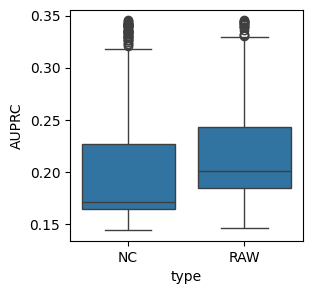

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

pdata = pd.concat([perf[['AUPRC']], perf_raw[['AUPRC']]])
pdata['type'] = np.repeat(['NC', 'RAW'], perf.shape[0])

plt.figure(figsize=(3,3))
sns.boxplot(x='type', y='AUPRC', data=pdata)